# MNIST Handwritten Digit Database

### Kütüphanelerin Yüklenmesi 

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

tf.__version__

'1.15.0'

### Veri Setinin Yüklenmesi

In [3]:
mnist=tf.keras.datasets.mnist #28*28 images

In [4]:
(x_train , y_train) , (x_test , y_test)=mnist.load_data()

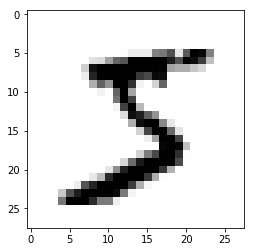

In [5]:
plt.imshow(x_train[0] , cmap=plt.cm.binary)
plt.show()

In [6]:
x_train=tf.keras.utils.normalize(x_train , axis=1)
x_test=tf.keras.utils.normalize(x_test , axis=1)

### Modelin Oluşturulması

In [7]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

### Modelin Eğitilmesi

In [10]:
model.fit(x_train,y_train,epochs=4)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0523 - acc: 0.9833
Epoch 2/4
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0396 - acc: 0.9870
Epoch 3/4
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0311 - acc: 0.9900
Epoch 4/4
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0267 - acc: 0.9914


In [11]:
val_loss, val_acc=model.evaluate(x_test,y_test)
print("loss:",val_loss,"acc:",val_acc)

10000/10000 [==============================] - 0s 22us/sample - loss: 0.1073 - acc: 0.9696
loss: 0.1072767959462013 acc: 0.9696


In [12]:
model.save('my_model.model')

In [8]:
my_model=tf.keras.models.load_model('my_model.model')

In [9]:
pred=my_model.predict([x_test])

In [10]:
print(pred)

[[9.4045882e-09 6.5634353e-08 3.3866900e-08 ... 9.9999893e-01
  1.7024165e-10 3.5584344e-07]
 [1.3986782e-11 1.1092065e-05 9.9998868e-01 ... 9.8674270e-13
  1.4978727e-10 1.0436381e-16]
 [4.2131077e-08 9.9997604e-01 7.7356276e-07 ... 1.8190372e-06
  7.9081037e-06 7.8855394e-10]
 ...
 [1.8439605e-12 2.1266926e-07 6.1584203e-11 ... 1.2091591e-05
  1.2604714e-08 2.3433645e-06]
 [7.2842052e-11 3.5359532e-12 1.7640364e-14 ... 2.3906116e-12
  4.0954184e-10 1.1393224e-12]
 [2.2997426e-09 5.6835696e-11 8.5431991e-12 ... 3.7447896e-16
  2.4962303e-11 2.7545388e-12]]


In [11]:
print(np.argmax(pred[3]))

0


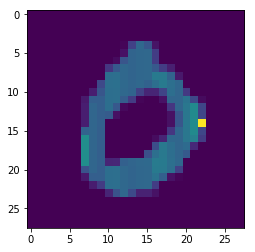

In [12]:
plt.imshow(x_test[3])
plt.show()

### Kendi Verilerimle Modelin Test Edilmesi

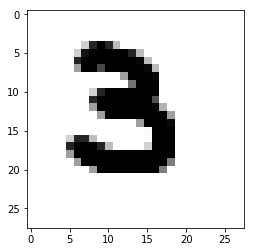

3


In [16]:
file="3.png"
image = cv.imread(file, cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28,28))
image = 255-image
image = image.reshape(1, 28, 28, 1)

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()
pred = my_model.predict(image.reshape(1, 28, 28), batch_size=1)

print(pred.argmax())